Note: this notebook is used as a playground for testing scripts, algos, results, EDA, etc. It will not ve refreshed by any shceduled job.

## Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import bt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
import plotly.graph_objects as go
import yfinance as yf
import talib
import datetime
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
import chewie_pack

## Importing Dataset

In [18]:
df = pd.read_csv('ticker_data.csv', index_col='Date', parse_dates=True)
indicators = chewie_pack.indicators

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24623 entries, 2014-09-17 to 2022-02-04
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            24623 non-null  float64
 1   High            24623 non-null  float64
 2   Low             24623 non-null  float64
 3   Close           24623 non-null  float64
 4   Volume          24623 non-null  int64  
 5   Dividends       24623 non-null  float64
 6   Stock Splits    24623 non-null  float64
 7   ticker          24623 non-null  object 
 8   nom_change      24613 non-null  float64
 9   pct_change      24613 non-null  float64
 10  SMA_10          24533 non-null  float64
 11  SMA_50          24133 non-null  float64
 12  EMA_10          24533 non-null  float64
 13  EMA_50          24133 non-null  float64
 14  ADX_10          23633 non-null  float64
 15  ADX_50          23633 non-null  float64
 16  RSI_10          24523 non-null  float64
 17  RSI_50        

In [20]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'ticker', 'nom_change', 'pct_change', 'SMA_10', 'SMA_50', 'EMA_10',
       'EMA_50', 'ADX_10', 'ADX_50', 'RSI_10', 'RSI_50', 'BB_10_upper',
       'BB_10_middle', 'BB_10_lower', 'BB_50_upper', 'BB_50_middle',
       'BB_50_lower', 'sg_AboveSMA_10', 'sg_AboveSMA_50', 'sg_AboveEMA_10',
       'sg_AboveEMA_50', 'sg_ADX_10', 'sg_ADX_50', 'sg_RSI_10', 'sg_RSI_50',
       'sg_BB_10', 'sg_BB_50'],
      dtype='object')

In [21]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,nom_change,pct_change,SMA_10,...,ADX_10,ADX_50,RSI_10,RSI_50,BB_10_upper,BB_10_middle,BB_10_lower,BB_50_upper,BB_50_middle,BB_50_lower
count,24623.000000,24623.000000,24623.000000,24623.000000,2.462300e+04,24623.000000,24623.000000,24613.000000,24613.000000,24533.000000,...,23633.000000,23633.000000,24523.000000,24123.000000,24533.000000,24533.000000,24533.000000,24133.000000,24133.000000,24133.000000
mean,1727.244822,1765.553246,1685.006387,1728.924095,3.005726e+09,0.001639,0.000772,2.091577,0.184868,1725.376188,...,14.301849,14.301859,54.265692,53.596369,1857.431958,1725.376198,1593.320439,2035.390728,1708.102444,1380.814159
std,6306.917441,6476.295430,6113.704585,6310.548210,8.879879e+09,0.026003,0.062115,256.052221,3.522048,6291.857837,...,6.168920,6.168940,14.913052,7.168798,6864.243453,6291.857843,5733.990328,7603.048921,6199.196884,4868.698567
min,0.023954,0.025993,0.019130,0.023961,7.922000e+03,0.000000,0.000000,-7554.040000,-42.350000,0.030000,...,3.640650,3.640000,7.230000,29.340000,0.028709,0.026482,-0.062973,0.040473,0.032968,-21.469339
25%,38.147503,38.698000,37.597655,38.213516,5.658818e+06,0.000000,0.000000,-1.090000,-0.900000,38.460000,...,9.482163,9.480000,43.690000,48.600000,40.369558,38.463406,36.208296,43.344000,39.310664,34.495329
50%,161.991209,163.931483,159.784459,161.733948,5.522720e+07,0.000000,0.000000,0.010000,0.090000,161.560000,...,13.120897,13.120000,54.270000,53.380000,169.644909,161.558168,153.744564,185.864175,161.123514,140.197455
75%,1079.679993,1094.507507,1064.186707,1079.634949,2.424406e+09,0.000000,0.000000,1.840000,1.160000,1082.390000,...,17.524943,17.520000,65.060000,58.200000,1132.550431,1082.389990,1023.874042,1195.236305,1084.532394,979.569792
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.750000,7.000000,7293.020000,136.680000,64698.850000,...,42.958320,42.960000,97.310000,84.980000,69025.163291,64698.849609,61368.912953,72219.851101,60801.771016,54468.973445


## Testing strategies

In [195]:
#df_test = df[df.index.year>=2020]
#df_test = df_test[df_test.ticker=='MSFT']
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]

<AxesSubplot:title={'center':'Backtest result'}>

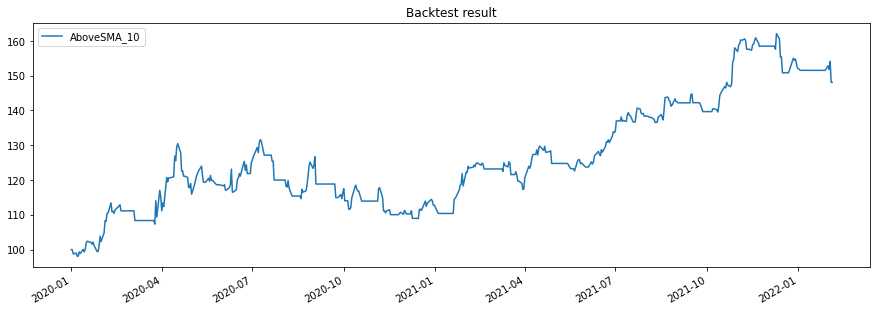

In [196]:
#df_test = df[df.ticker=='MSFT']['Close'].to_frame()
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
price = df_test.Close.to_frame(name='Close')
ref = df_test.SMA_10.to_frame(name='Close')

# Define the signal-based strategy
bt_strategy = bt.Strategy('AboveSMA_10',
                        [bt.algos.SelectWhere( price > ref ),
                        bt.algos.WeighEqually(),
                        bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')

# !!!!Reminder to correct all the sg_MA_x

<AxesSubplot:title={'center':'Backtest result'}>

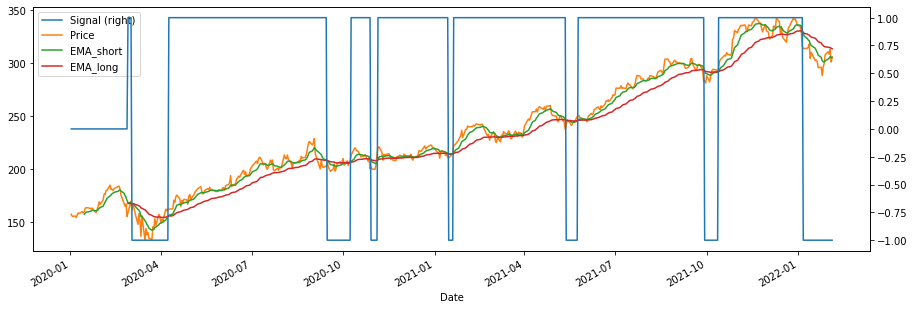

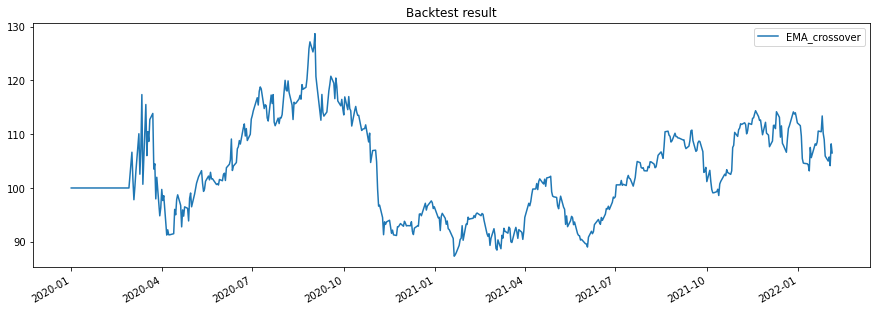

In [197]:
#### MA crossover strategy
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
price = df_test.Close.to_frame(name='Close')

# Calculate the indicators
EMA_short = talib.EMA(df_test['Close'], timeperiod=10).to_frame(name='Close')
EMA_long = talib.EMA(df_test['Close'], timeperiod=40).to_frame(name='Close')

# Create the signal DataFrame
signal = EMA_long.copy()
signal[EMA_long.isnull()] = 0
# Construct the signal
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

# Plot the signal, price and MAs
combined_df = bt.merge(signal, price, EMA_short, EMA_long)
combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long']
combined_df.plot(secondary_y=['Signal'])

# Define the strategy
bt_strategy = bt.Strategy('EMA_crossover', 
                [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')

In [198]:
signal.reset_index().Close.value_counts()

 1.0    399
-1.0     91
 0.0     39
Name: Close, dtype: int64

In [199]:
df_test.sg_RSI_10.apply(chewie_pack.BHS_to_sg).value_counts()

 0    494
-1     34
 1      1
Name: sg_RSI_10, dtype: int64

In [200]:
df_test.sg_RSI_10.value_counts()

hold    494
sell     34
buy       1
Name: sg_RSI_10, dtype: int64

<AxesSubplot:title={'center':'Backtest result'}>

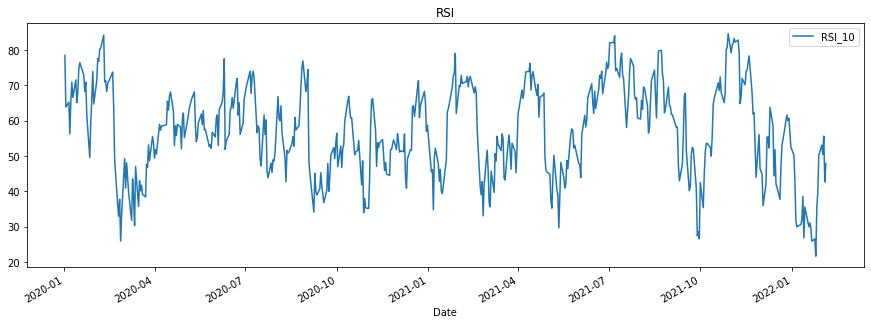

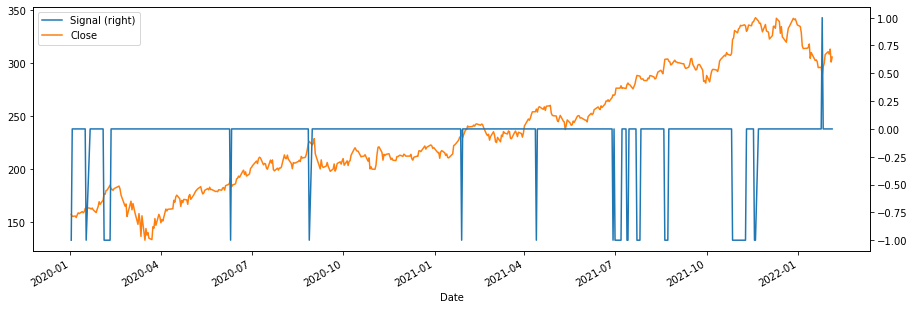

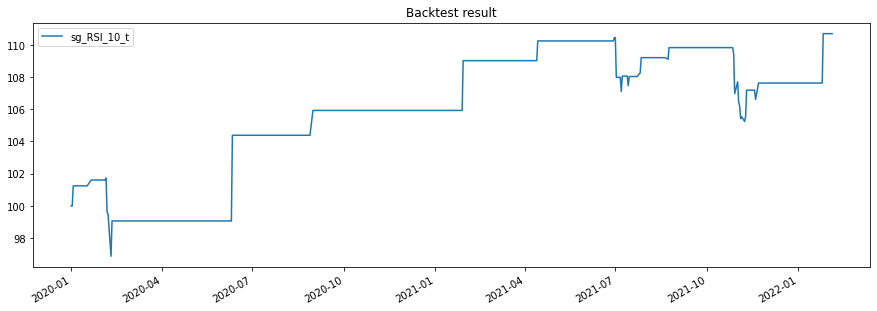

In [201]:
#### RSI-based Mean Reversion Strategy
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
close = df_test.Close.to_frame(name='Close')
sg_RSI_10_t = df_test.sg_RSI_10.to_frame(name='Close')

# Construct the signal
signal = df_test.sg_RSI_10.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')

df_test.RSI_10.to_frame().plot()
plt.title('RSI')

# Plot the signal, price and MAs
combined_df = bt.merge(signal, close, sg_RSI_10_t)
combined_df.columns = ['Signal', 'Close', 'sg_RSI_10_t']
combined_df.plot(secondary_y=['Signal'])

# Define the strategy
bt_strategy = bt.Strategy('sg_RSI_10_t', 
                [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, close)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')


In [202]:
#### Benchmarking example
def buy_and_hold(name, df, ticker, start='2020-01-01', end='2021-12-31'):
    # Get the data
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(name,
        [bt.algos.RunOnce(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, close)

In [207]:
#### Strategy Optimization example
def signal_rever(df, ticker, signal_name, start='2020-01-01', end='2021-12-31'):
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    signal = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)][signal_name]
    signal = signal.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')    
    # Define the signal-based strategy
    bt_strategy = bt.Strategy(signal_name,
                 [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()]) 
    return bt.Backtest(bt_strategy, close)

In [208]:
# Strategy Optimization example
def signal_trend(df, ticker, signal_name, start='2018-4-1', end='2020-11-1'):
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    signal = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)][signal_name]
    signal = signal.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')
    # Define the signal-based strategy
    bt_strategy = bt.Strategy(signal_name,
        [bt.algos.SelectWhere(signal),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()])
    return bt.Backtest(bt_strategy, close)

In [204]:
chewie_pack.indicators

['sg_AboveSMA_10',
 'sg_AboveSMA_50',
 'sg_AboveEMA_10',
 'sg_AboveEMA_50',
 'sg_ADX_10',
 'sg_ADX_50',
 'sg_RSI_10',
 'sg_RSI_50',
 'sg_BB_10',
 'sg_BB_50']

<AxesSubplot:title={'center':'Strategy Optimization'}>

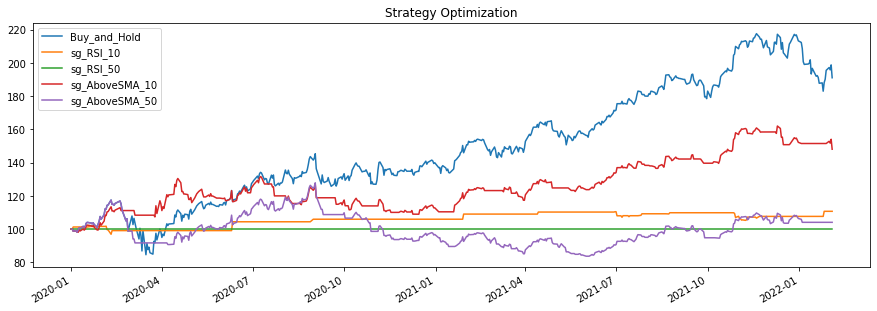

In [215]:
ticker='MSFT'
start='2020-01-01'
end='2022-02-04'

benchmark = buy_and_hold(df=df, ticker=ticker, name='Buy_and_Hold', start=start, end=end)
sg_RSI_10 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_10', start=start, end=end)
sg_RSI_50 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_50', start=start, end=end)
sg_AboveSMA_10 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_10', start=start, end=end)
sg_AboveSMA_50 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_50', start=start, end=end)
# Run all backtests and plot the resutls
bt_results = bt.run(benchmark, sg_RSI_10, sg_RSI_50, sg_AboveSMA_10, sg_AboveSMA_50)
bt_results.plot(title='Strategy Optimization')

<AxesSubplot:title={'center':'Strategy Optimization'}>

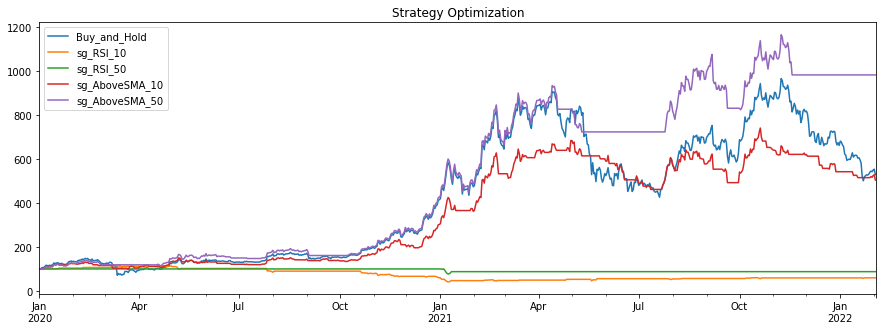

In [214]:
ticker='BTC-USD'
start='2020-01-01'
end='2022-02-04'

benchmark = buy_and_hold(df=df, ticker=ticker, name='Buy_and_Hold', start=start, end=end)
sg_RSI_10 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_10', start=start, end=end)
sg_RSI_50 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_50', start=start, end=end)
sg_AboveSMA_10 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_10', start=start, end=end)
sg_AboveSMA_50 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_50', start=start, end=end)
# Run all backtests and plot the resutls
bt_results = bt.run(benchmark, sg_RSI_10, sg_RSI_50, sg_AboveSMA_10, sg_AboveSMA_50)
bt_results.plot(title='Strategy Optimization')